**Tips.csv**

Abrindo base de dados previamente gravada no Drive e analisando as suas variáveis.

Variável de interesse deve ser construída para indicar se uma gorjeta é maior ou menor do que mediana.

total_bill e tip tem que ser dropadas pois há endogeneidade com a variável de interesse.

sex, smoker, day e time precisam ser convertidas.

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/datasets/tips.csv')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Criando a variável com a relação de tip e total_bill.

Se maior que a mediana, então tip_size = 1 (um boa gorjeta)

Se menor ou igual a mediana, tip_size = 0 (uma gorjeta ruim)

In [7]:
df['tip_size'] = df['tip'] / df['total_bill']
df.head(1)
median = df['tip_size'].median()
df['tip_size'] = df.apply(lambda row: 1 if row['tip_size'] > median else 0, axis=1)


Convertendo o dia da semana em variáveis dummy.

Observar se a distribuição de 'day' bate com as distribuições dos dias da semana individuais.

In [8]:
print(df['day'].value_counts())
df['sun'] = df.apply(lambda row: 1 if row['day'] == 'Sun' else 0, axis=1)
df['sat'] = df.apply(lambda row: 1 if row['day'] == 'Sat' else 0, axis=1)
df['fri'] = df.apply(lambda row: 1 if row['day'] == 'Fri' else 0, axis=1)
df['thu'] = df.apply(lambda row: 1 if row['day'] == 'Thur' else 0, axis=1)
print(df['sun'].value_counts())
print(df['sat'].value_counts())
print(df['fri'].value_counts())
print(df['thu'].value_counts())

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
sun
0    168
1     76
Name: count, dtype: int64
sat
0    157
1     87
Name: count, dtype: int64
fri
0    225
1     19
Name: count, dtype: int64
thu
0    182
1     62
Name: count, dtype: int64


Convertendo variáveis binárias e conferindo as quantidades.

In [9]:
print(df['time'].value_counts())
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
df['dinner'] = df.apply(lambda row: 1 if row['time'] == 'Dinner' else 0, axis=1)
df['female'] = df.apply(lambda row: 1 if row['sex'] == 'Female' else 0, axis=1)
df['smoke'] = df.apply(lambda row: 1 if row['smoker'] == 'Yes' else 0, axis=1)
print(df['dinner'].value_counts())
print(df['female'].value_counts())
print(df['smoke'].value_counts())


time
Dinner    176
Lunch      68
Name: count, dtype: int64
sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
dinner
1    176
0     68
Name: count, dtype: int64
female
0    157
1     87
Name: count, dtype: int64
smoke
0    151
1     93
Name: count, dtype: int64


Cópia de segurança do meu df original.

Removendo as colunas que não são mais necessárias.

Conferindo se tenho sometne variáveis numéricas no meu dataset.

In [10]:
df1 = df.copy()
del df1['total_bill']
del df1['tip']
del df1['time']
del df1['sex']
del df1['day']
del df1['smoker']
df1.head()


,size,tip_size,sun,sat,fri,thu,dinner,female,smoke
0,2,0,1,0,0,0,1,1,0
1,3,1,1,0,0,0,1,0,0
2,3,1,1,0,0,0,1,0,0
3,2,0,1,0,0,0,1,0,0
4,4,0,1,0,0,0,1,1,0


**Tudo perfeito para iniciar os testes com os classificadores! \o/**


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = df1.drop('tip_size', axis='columns')
y = df1['tip_size']

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = {
  'random_state':[True],
  'n_estimators': [10,20],
  'max_depth': range(1,20)
}

gs = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))
best_estimator = gs.best_estimator_


0.6639344262295082


In [12]:
gs.best_params_


{'max_depth': 8, 'n_estimators': 10, 'random_state': True}

In [13]:
results = pd.DataFrame(gs.cv_results_)
results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016831,0.001077,0.003026,0.000118,1,10,True,"{'max_depth': 1, 'n_estimators': 10, 'random_s...",0.448980,0.510204,0.346939,0.428571,0.500000,0.446939,0.058582,31
1,0.032275,0.003998,0.004033,0.000715,1,20,True,"{'max_depth': 1, 'n_estimators': 20, 'random_s...",0.571429,0.530612,0.367347,0.428571,0.395833,0.458759,0.078847,16
2,0.017668,0.001406,0.003442,0.000403,2,10,True,"{'max_depth': 2, 'n_estimators': 10, 'random_s...",0.551020,0.346939,0.367347,0.428571,0.437500,0.426276,0.071357,35
3,0.031190,0.001075,0.003902,0.000253,2,20,True,"{'max_depth': 2, 'n_estimators': 20, 'random_s...",0.551020,0.510204,0.346939,0.448980,0.416667,0.454762,0.071344,29
4,0.020201,0.004808,0.003119,0.000219,3,10,True,"{'max_depth': 3, 'n_estimators': 10, 'random_s...",0.489796,0.448980,0.387755,0.448980,0.500000,0.455102,0.039573,28
5,0.031253,0.001208,0.004086,0.000581,3,20,True,"{'max_depth': 3, 'n_estimators': 20, 'random_s...",0.510204,0.510204,0.367347,0.489796,0.458333,0.467177,0.053401,2
6,0.023454,0.004547,0.004776,0.001540,4,10,True,"{'max_depth': 4, 'n_estimators': 10, 'random_s...",0.510204,0.346939,0.346939,0.469388,0.437500,0.422194,0.065626,37
7,0.054029,0.003457,0.006098,0.000813,4,20,True,"{'max_depth': 4, 'n_estimators': 20, 'random_s...",0.571429,0.367347,0.387755,0.469388,0.458333,0.450850,0.071962,30
8,0.029573,0.000735,0.005424,0.001625,5,10,True,"{'max_depth': 5, 'n_estimators': 10, 'random_s...",0.448980,0.387755,0.346939,0.551020,0.375000,0.421939,0.072650,38
9,0.051118,0.001817,0.005155,0.000160,5,20,True,"{'max_depth': 5, 'n_estimators': 20, 'random_s...",0.469388,0.428571,0.387755,0.489796,0.375000,0.430102,0.044584,33


In [14]:
params = {
  'random_state':[True],
  'criterion': ['log_loss','gini'],
  'max_depth': range(1,15)
}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))


0.5491803278688525


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

params = {
  'solver': ['lsqr','svd'],
}

gs = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))


0.5286885245901639


<Axes: >

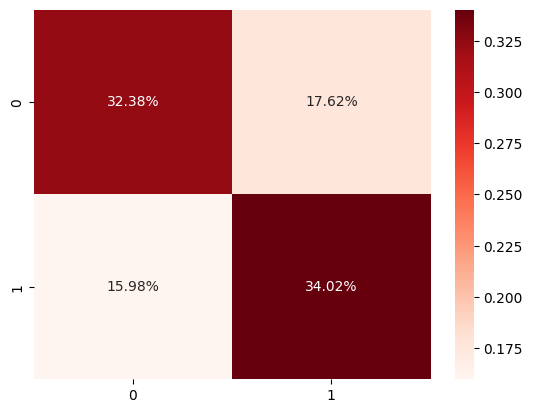

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = best_estimator.predict(x)
matrix = confusion_matrix(y, y_pred)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')

In [17]:
# https://www.kaggle.com/datasets/prathamtripathi/drug-classification